# Visualising the concept of gene-set enrichment analysis

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

def plot_color_gradients(cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = (0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.5)*2
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.25 / figh,
                        left=0.2, right=0.9)
    axs[0].set_title('Differential Expression Profile ($N \sim 10^4$)', fontsize=16)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, 'Negative', va='center', ha='right', fontsize=14,
                transform=ax.transAxes)
        ax.text(1.01, 0.5, 'Positive', va='center', ha='left', fontsize=14,
                transform=ax.transAxes)

        geneset_stats = {'GeneSet_A': np.random.beta(2, 5, 20),
                'GeneSet_B': np.random.uniform(0, 1, 20),
                'GeneSet_C': np.random.beta(5, 1, 20)}
        for index, key in enumerate(geneset_stats):
            stats = geneset_stats[key]
            col = list(mpl.colors.TABLEAU_COLORS.values())[index]
            ymin = 1-index*0.33
            ymax = 1-index*0.33-0.25
            ymid = (ymin+ymax)/2
            plt.text(-0.01, ymid, key, va='center', ha='right', fontsize=12)
            for xc in stats:
                plt.axvline(x=xc, ymin=ymin, ymax=ymax, color=col)
        
    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

In [2]:
gradient = np.linspace(1, 0, 256)
gradient = np.vstack((gradient, gradient))

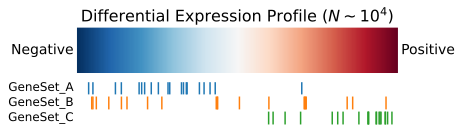

In [3]:
cmaps = ['RdBu']
plot_color_gradients(cmaps)
plt.show()